In [1]:
'''
Esther Aruti
BME I5000: Medical Imaging and Signal Processing
September 26, 2024
Homework #2: Kernels and Convolutions
'''

import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL
from PIL import Image

In [2]:
##### LOAD IN IMAGE #####
cellimg = Image.open('C:\\Users\\esthe\Medical Imaging and Signal Processing\\cell.tif')
# resize cell image
img_array = np.array(cellimg)
small_img = img_array[:100,:100]

In [3]:
##### CREATE FUNCTION FOR NORMAL KERNEL #####
def normal_kernel(N,sigma,image):
    N = N # define kernel size
    sigma = sigma # std of the gaussian

    # create a matrix
    x = np.linspace(0, N - 1, N) - (N - 1) * 0.5
    y = np.linspace(0, N - 1, N) - (N - 1) * 0.5
    x, y = np.meshgrid(x, y)

    # calc squared distance from center
    r2 = x**2 + y**2

    # create the gaussian kernel
    gaussian_kernel = np.exp(-r2/(2*sigma**2))

    # normalize kernel to sum to 1
    normal_kernel = gaussian_kernel/np.sum(gaussian_kernel)

    # print kernel properties
    print(f'Kernel Sum: {np.sum(normal_kernel):.5f}')

    # Select the middle row of the kernel
    center_line = normal_kernel[N // 2, :]

    # convolve
    convolved_img = scipy.signal.convolve2d(image, normal_kernel, mode='same')
    
    # plot
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

    # plot original image
    ax1.imshow(image)
    ax1.set_title('Original Image')

    # plot normalized kernel
    contour = ax2.contourf(x, y, normal_kernel, cmap='viridis')
    fig.colorbar(contour, ax=ax2)
    ax2.set_title(f'Contour Plot of Normal Kernel, Size {N} and Sigma {sigma}')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')

    # plot kernel's line plot
    ax3.plot(x[0], center_line)
    ax3.axhline(0, color='white')
    ax3.set_title(f'Line Plot of Normal Kernel, Size {N} and Sigma {sigma}')
    ax3.set_xlabel('X')

    # plot convolved image
    ax4.imshow(convolved_img)
    ax4.set_title('Convolved Image with Normal Kernel')

    plt.tight_layout()
    plt.show()

In [4]:
##### CREATE FUNCTION FOR MEXICAN HAT KERNEL #####
def mexican_hat_kernel(N,sigma,image):
    N = N # define kernel size
    sigma = sigma # std of the gaussian

    # create a matrix
    x = np.linspace(0, N - 1, N) - (N - 1) * 0.5
    y = np.linspace(0, N - 1, N) - (N - 1) * 0.5
    X, Y = np.meshgrid(x, y)

    # calc squared distance from center
    r2 = X**2 + Y**2

    # create positive gaussian kernel
    pos_kernel = np.exp(-r2 / (2 * sigma**2))
    pos_kernel_sum = np.sum(pos_kernel)
    pos_kernel /= pos_kernel_sum  # normalize so that it sums to 1

    # create two negative gaussian kernels
    
    # negative kernel 1
    neg_kernel_1 = np.exp(-((X + 2)**2 + Y**2) / (2 * sigma**2)) 
    neg_kernel_sum1 = np.sum(neg_kernel_1)
    neg_kernel_1 *= (-0.5 / neg_kernel_sum1)  # normalize so that it sums to -0.5

    # neg_kernel_2
    neg_kernel_2 = np.exp(-((X - 2)**2 + Y**2) / (2 * sigma**2)) 
    neg_kernel_sum2 = np.sum(neg_kernel_2)
    neg_kernel_2 *= (-0.5 / neg_kernel_sum2)

    # combine kernels
    kernel = pos_kernel + neg_kernel_1 + neg_kernel_2

    # normalize to 0
    mexican_hat_kernel = kernel - np.mean(kernel)

    # Check the kernel properties
    print('Positive Kernel sum:', np.sum(pos_kernel))  # Should be 1
    print('Negative Kernel sum:', np.sum(neg_kernel_1 + neg_kernel_2))  # Should be -1
    print(f'Kernel Sum: {np.sum(mexican_hat_kernel):.5f}')

    # Select the middle row of the kernel
    center_line = mexican_hat_kernel[N // 2, :]

    # convolve
    convolved_img = scipy.signal.convolve2d(image, mexican_hat_kernel, mode='same')

    # plot
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

    # plot original image
    ax1.imshow(image)
    ax1.set_title('Original Image')

    # plot normalized kernel
    contour = ax2.contourf(x, y, mexican_hat_kernel, cmap='viridis')
    fig.colorbar(contour, ax=ax2)
    ax2.set_title(f'Contour Plot of Mexican Hat Kernel, Size {N} and Sigma {sigma}')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')

    # plot kernel's line plot
    ax3.plot(x, center_line)
    ax3.axhline(0, color='white')
    ax3.set_title(f'Line Plot of Mexican Hat Kernel, Size {N} and Sigma {sigma}')
    ax3.set_xlabel('X')

    # plot convolved image
    ax4.imshow(convolved_img)
    ax4.set_title('Convolved Image with Mexican Hat Kernel')

    plt.tight_layout()
    plt.show()

In [5]:
##### CREATE FUNCTION FOR SINE KERNEL #####
def sine_kernel(N,sigma,image):
    N = N # define kernel size
    sigma = sigma # std of the gaussian

    # create a matrix
    x = np.linspace(0, N - 1, N) - (N - 1) * 0.5
    y = np.linspace(0, N - 1, N) - (N - 1) * 0.5
    X, Y = np.meshgrid(x, y)

    # calc squared distance from center
    r2 = X**2 + Y**2

    # create positive gaussian kernel
    pos_kernel = np.exp(-r2 / (2 * sigma**2))
    pos_kernel_sum = np.sum(pos_kernel)
    pos_kernel /= pos_kernel_sum  # normalize so that it sums to 1
    
    # create negative kernel
    neg_kernel_1 = np.exp(-((X + 2)**2 + Y**2) / (2 * sigma**2)) 
    neg_kernel_1 *= (-1 / np.sum(neg_kernel_1))

    # combine kernels
    kernel = pos_kernel + neg_kernel_1

    # normalize to 0
    sine_kernel = kernel - np.mean(kernel)

    # Check the kernel properties
    print('Positive Kernel sum:', np.sum(pos_kernel))  # Should be 1
    print('Negative Kernel sum:', np.sum(neg_kernel_1))  # Should be -1
    print(f'Kernel Sum: {np.sum(sine_kernel):.5f}')

    # Select the middle row of the kernel
    center_line = kernel[N // 2, :]

    # convolve
    convolved_img = scipy.signal.convolve2d(image, sine_kernel, mode='same')

    # plot
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

    # plot original image
    ax1.imshow(image)
    ax1.set_title('Original Image')

    # plot normalized kernel
    contour = ax2.contourf(x, y, sine_kernel, cmap='viridis')
    fig.colorbar(contour, ax = ax2)
    ax2.set_title(f'Contour Plot of Sine Kernel, Size {N} and Sigma {sigma}')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')

    # plot kernel's line plot
    ax3.plot(x, center_line)
    ax3.axhline(0, color='white')
    ax3.set_title(f'Line Plot of Sine Kernel, Size {N} and Sigma {sigma}')
    ax3.set_xlabel('X')

    # plot convolved image
    ax4.imshow(convolved_img)
    ax4.set_title('Convolved Image with Sine Kernel')

    plt.tight_layout()
    plt.show()


Kernel Sum: 1.00000


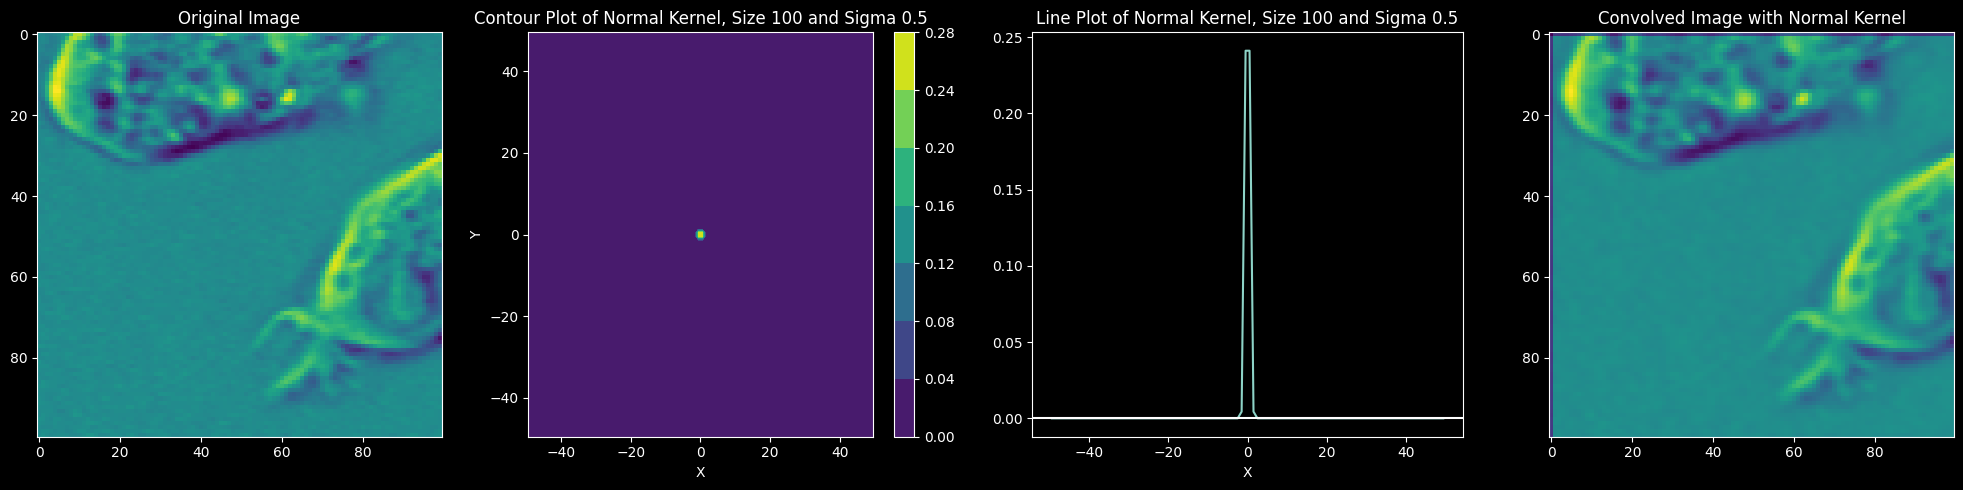

Positive Kernel sum: 0.9999999999999999
Negative Kernel sum: -0.9999999999999999
Kernel Sum: 0.00000


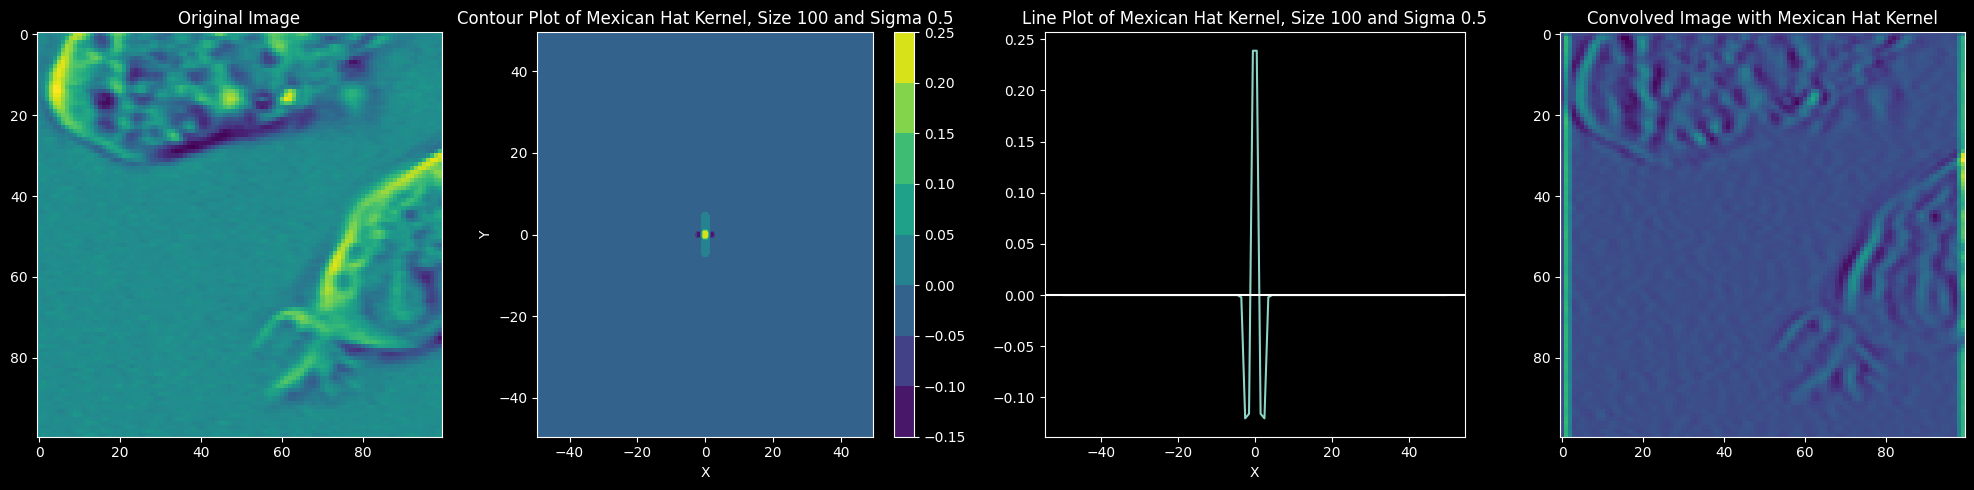

Positive Kernel sum: 0.9999999999999999
Negative Kernel sum: -0.9999999999999999
Kernel Sum: -0.00000


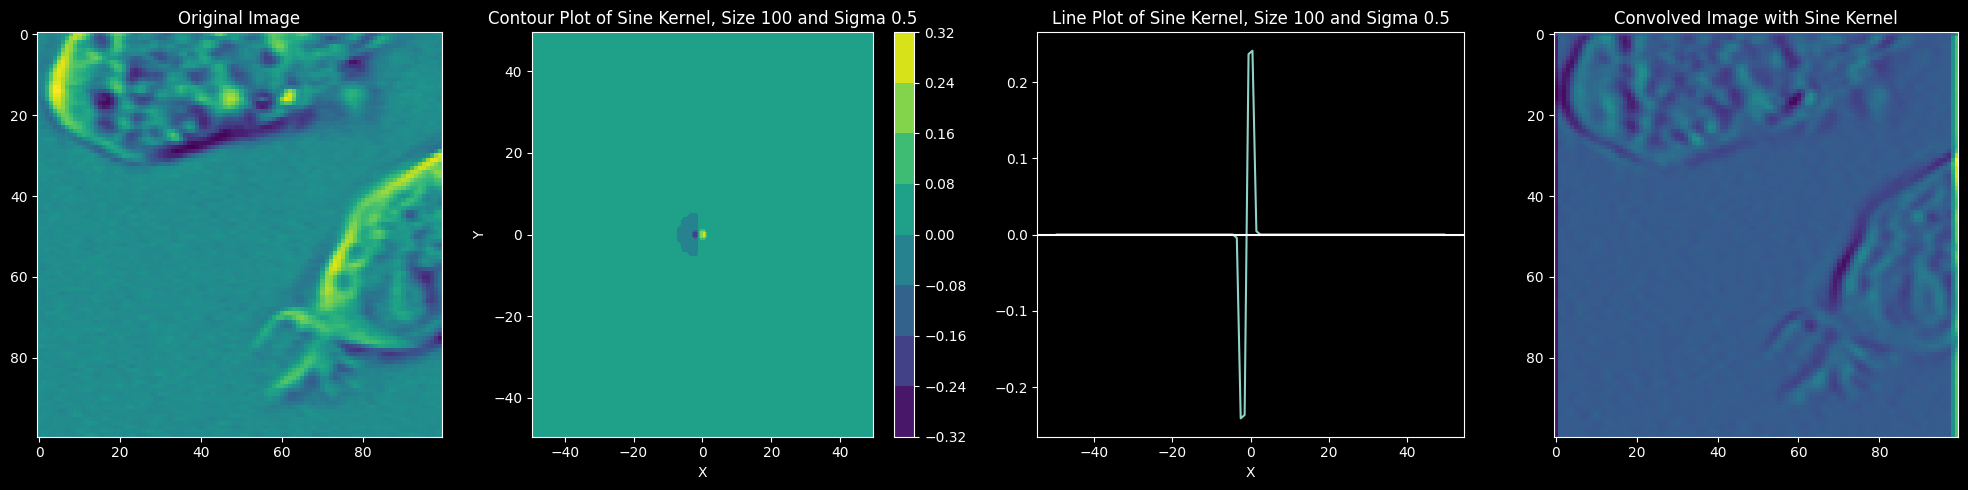

Kernel Sum: 1.00000


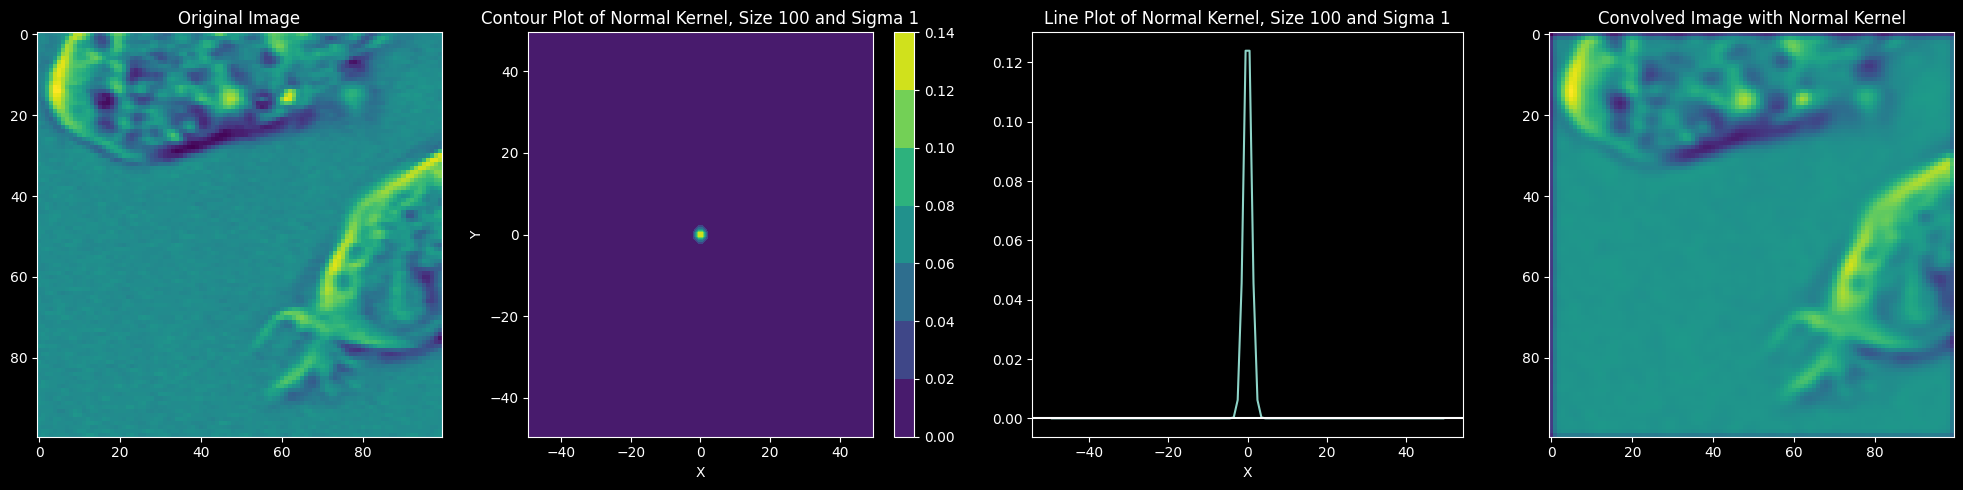

Positive Kernel sum: 0.9999999999999999
Negative Kernel sum: -0.9999999999999999
Kernel Sum: 0.00000


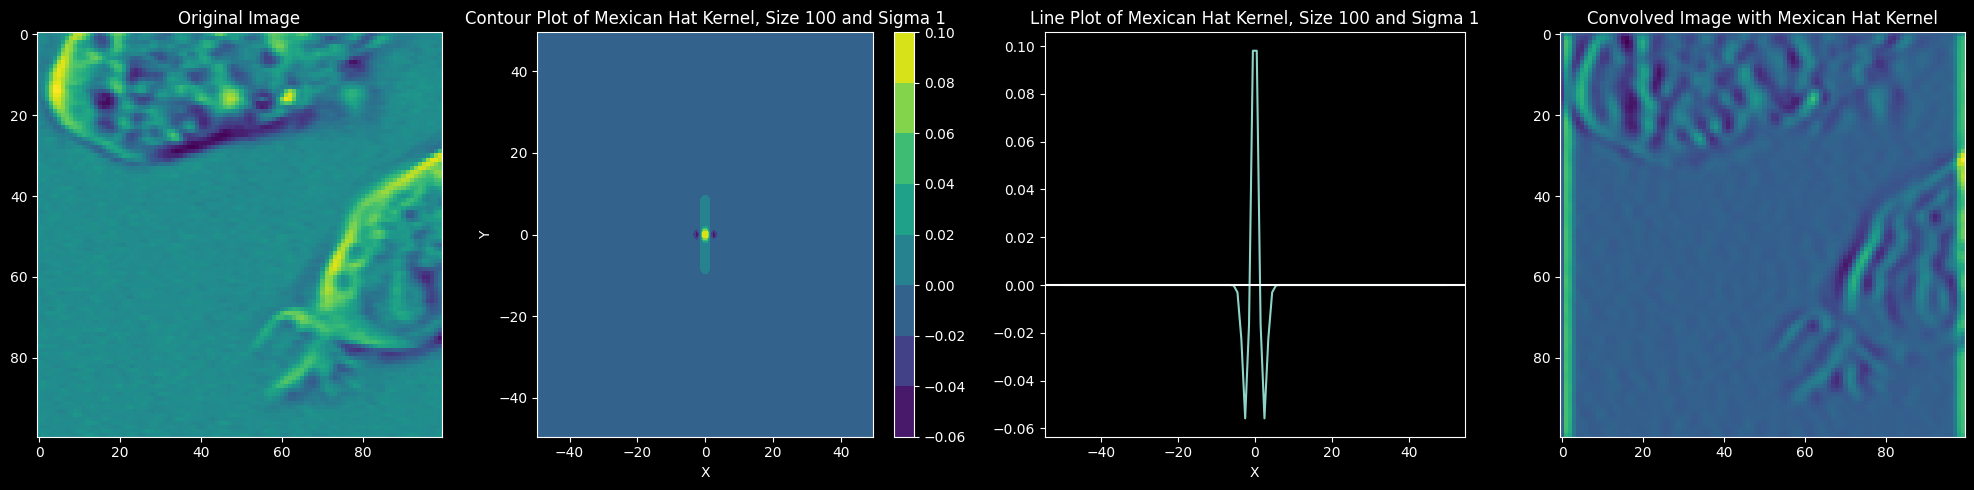

Positive Kernel sum: 0.9999999999999999
Negative Kernel sum: -0.9999999999999999
Kernel Sum: 0.00000


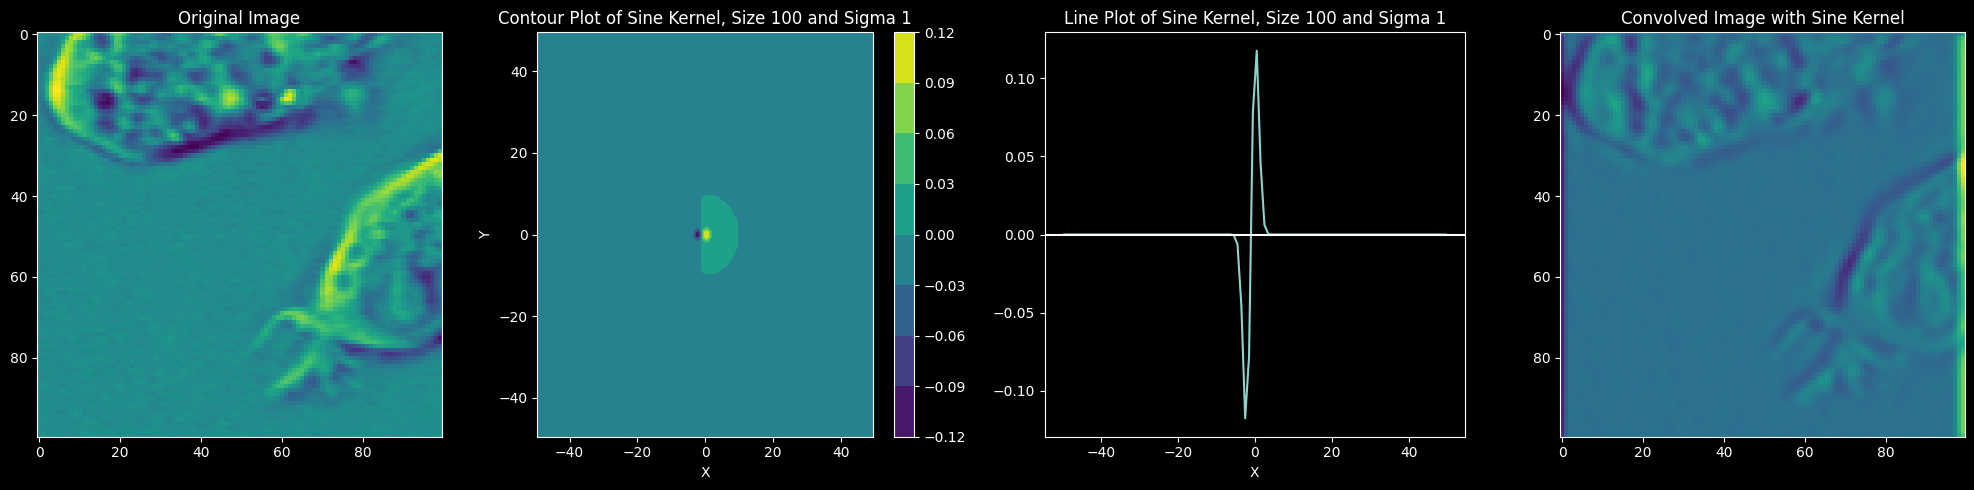

Kernel Sum: 1.00000


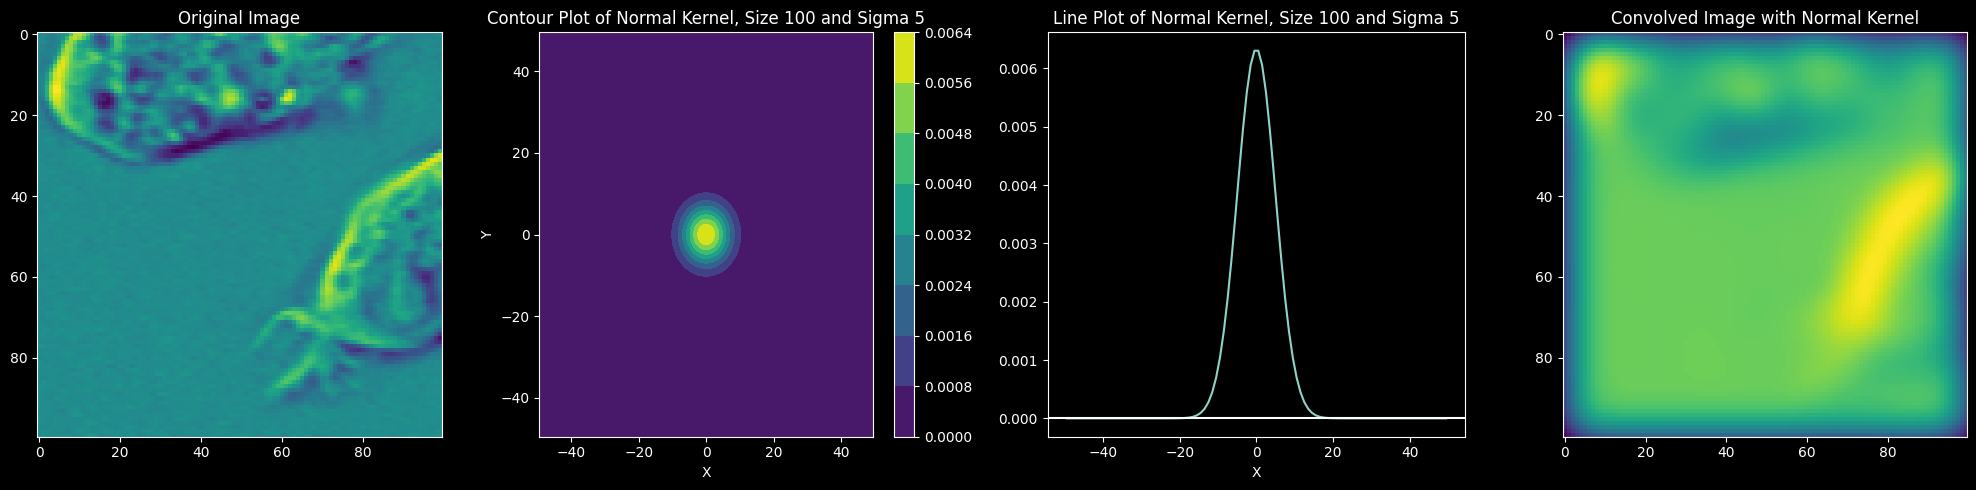

Positive Kernel sum: 0.9999999999999998
Negative Kernel sum: -0.9999999999999999
Kernel Sum: 0.00000


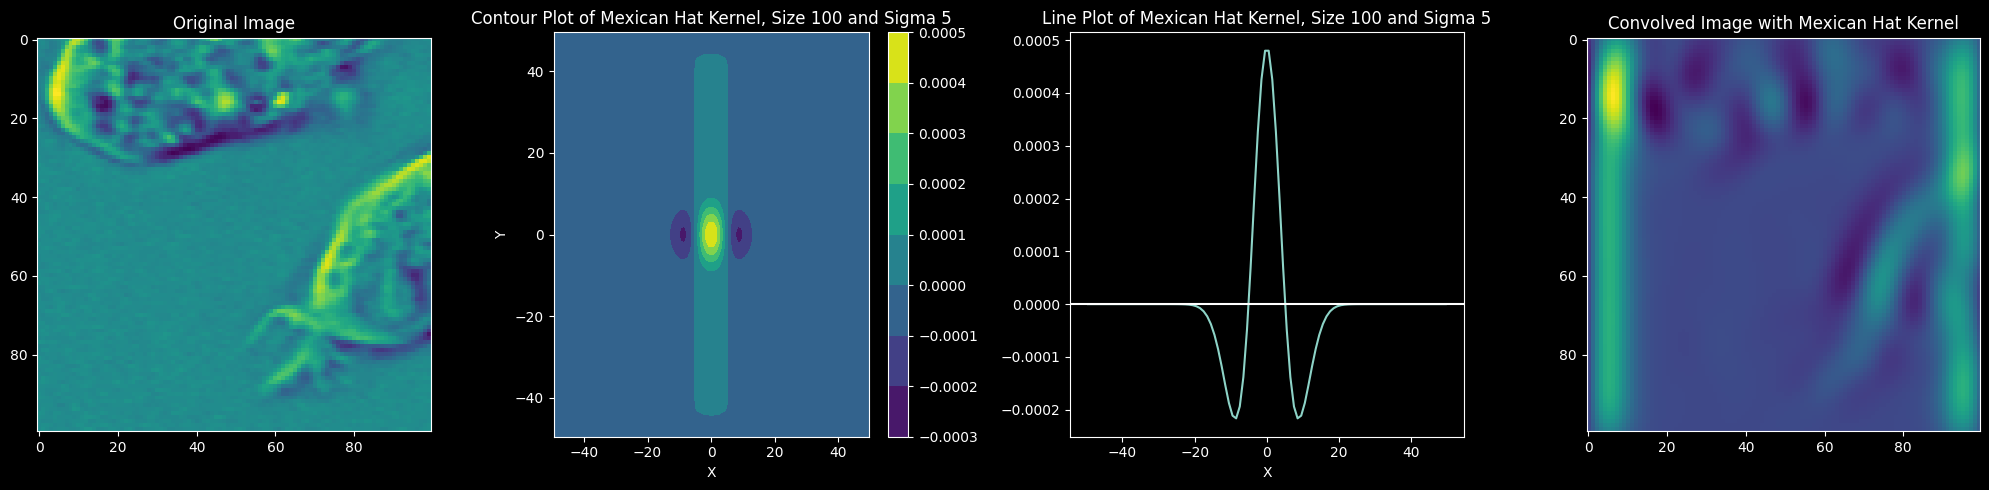

Positive Kernel sum: 0.9999999999999998
Negative Kernel sum: -0.9999999999999998
Kernel Sum: 0.00000


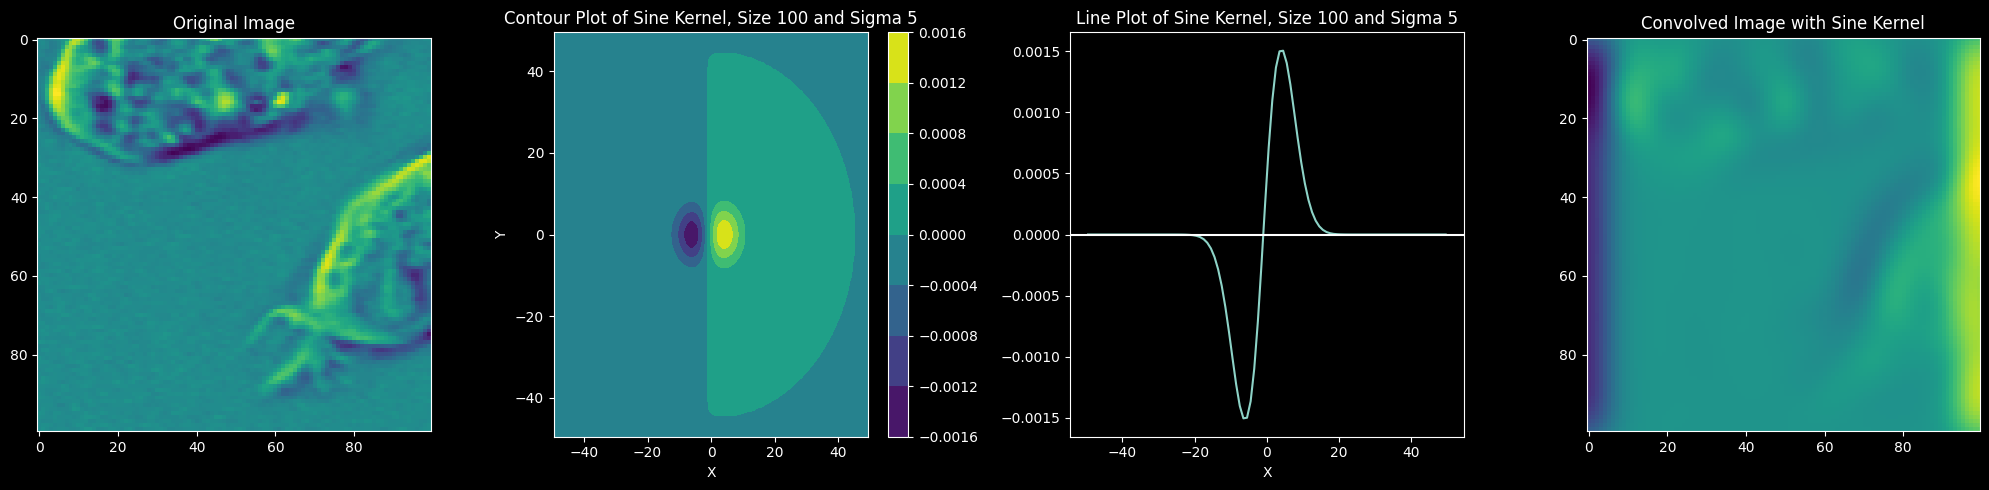

Kernel Sum: 1.00000


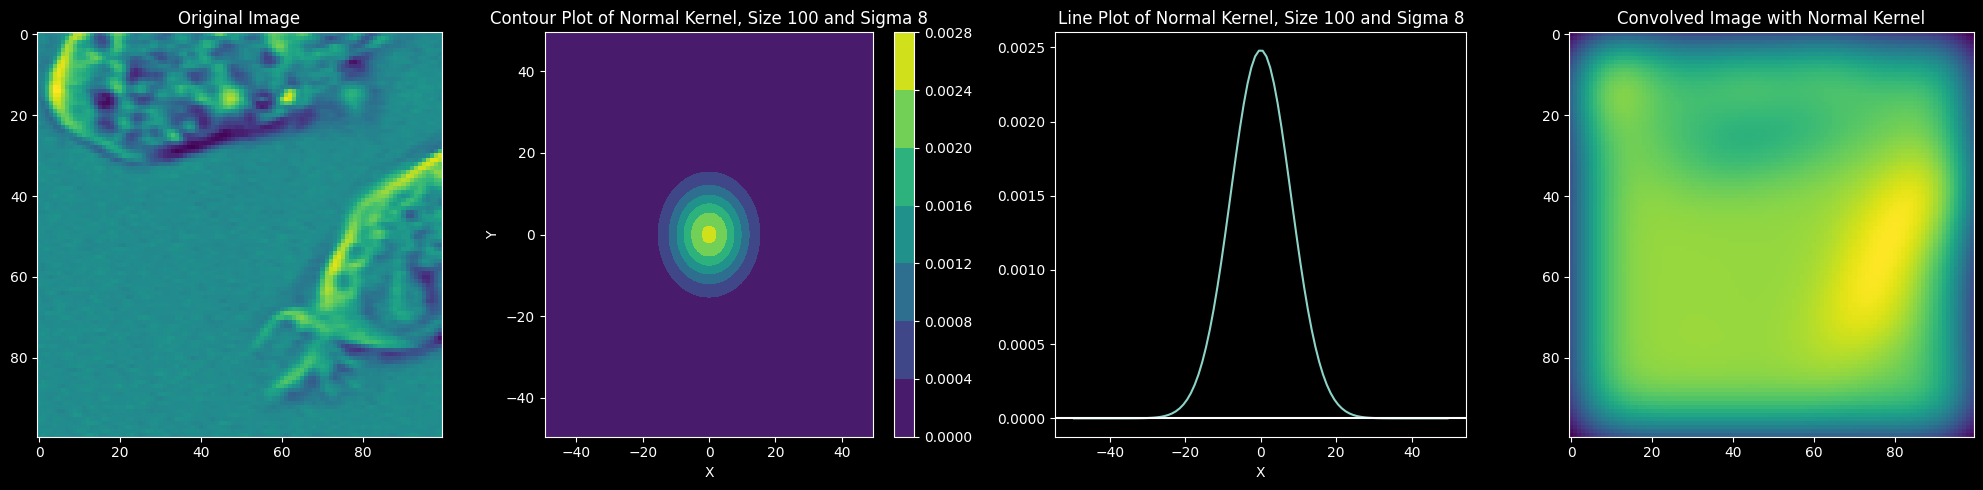

Positive Kernel sum: 1.0
Negative Kernel sum: -1.0
Kernel Sum: 0.00000


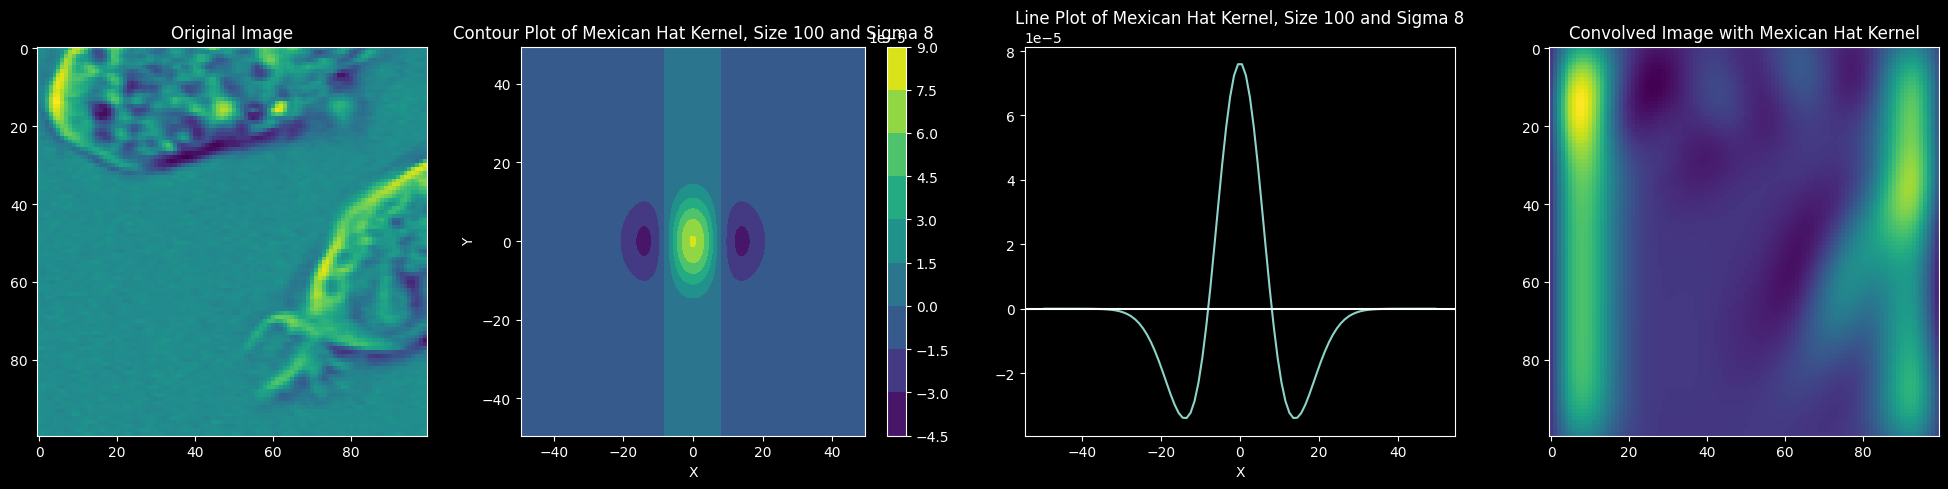

Positive Kernel sum: 1.0
Negative Kernel sum: -1.0000000000000002
Kernel Sum: -0.00000


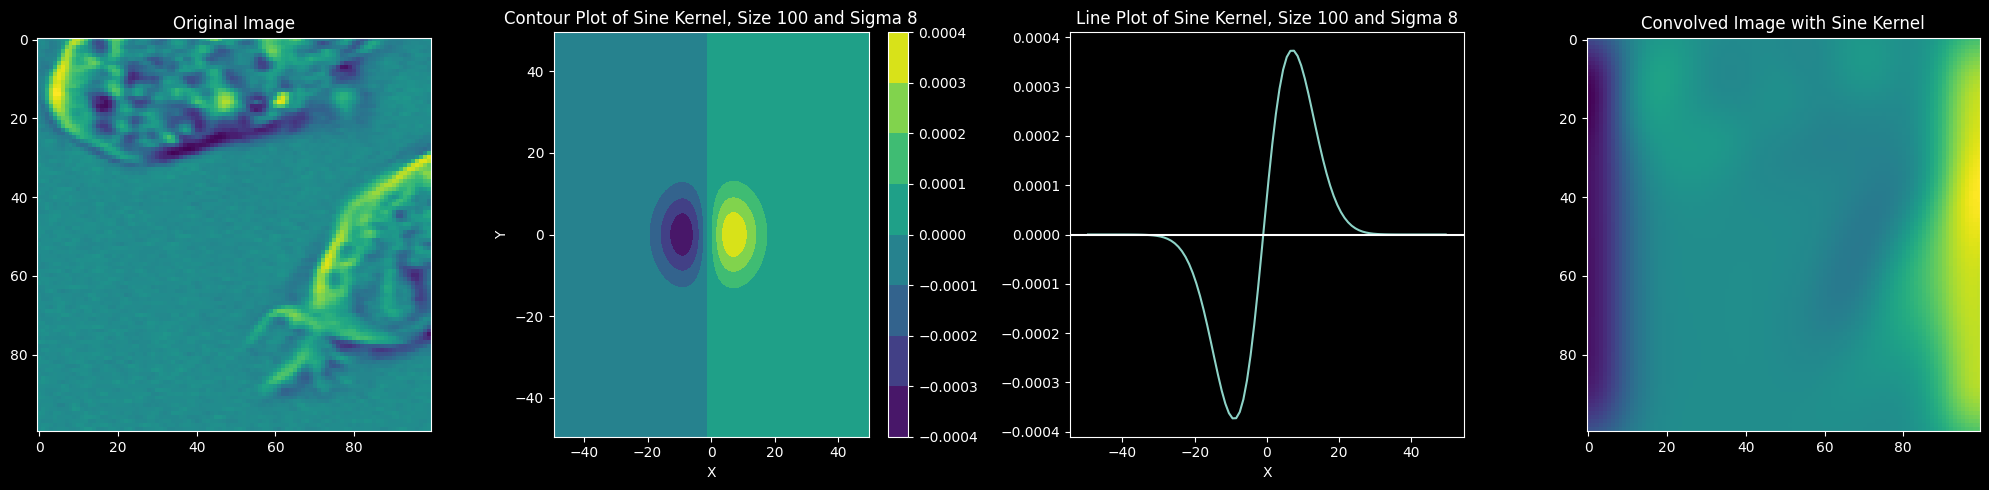

Kernel Sum: 1.00000


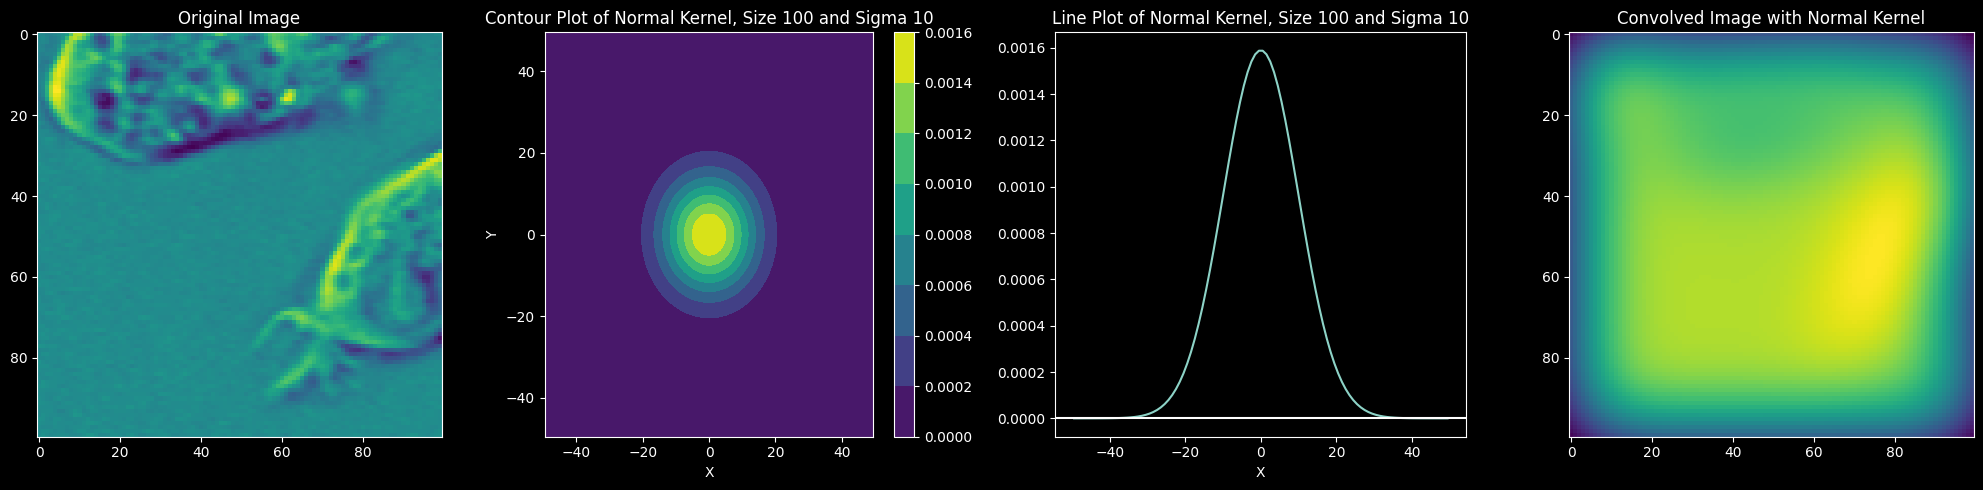

Positive Kernel sum: 0.9999999999999999
Negative Kernel sum: -1.0
Kernel Sum: -0.00000


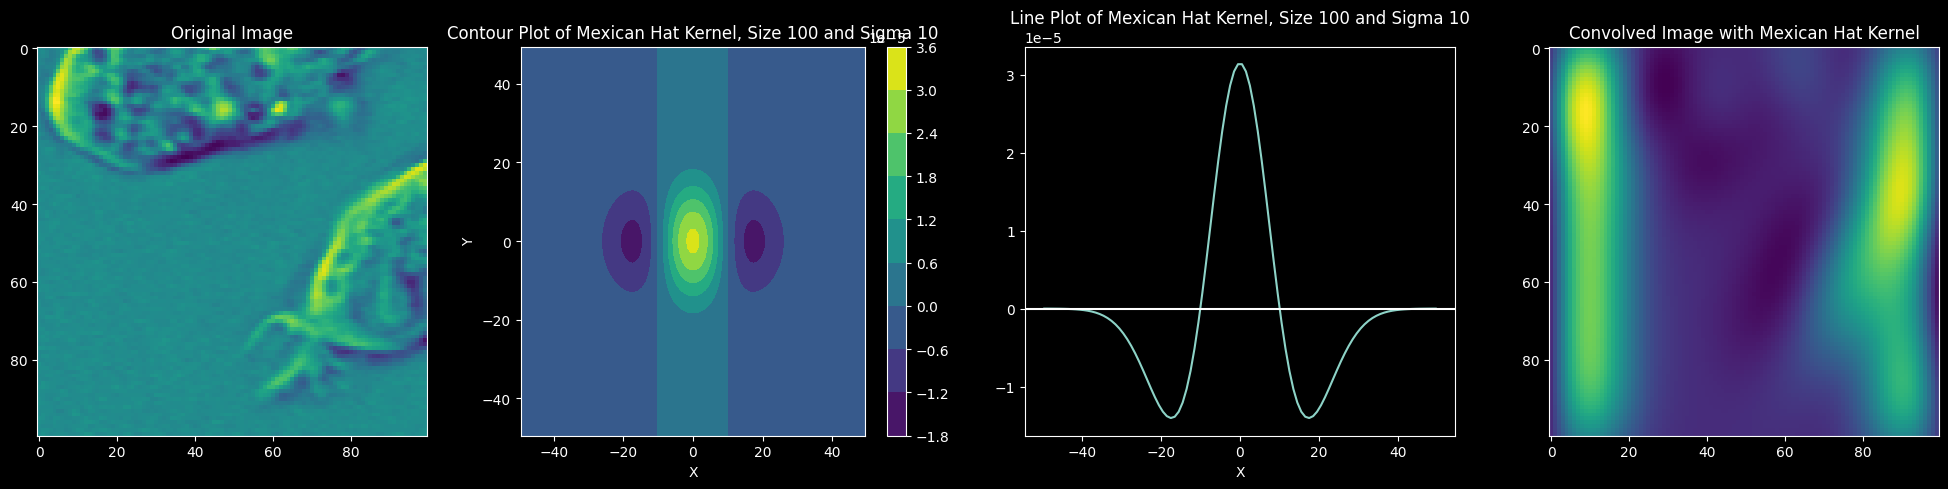

Positive Kernel sum: 0.9999999999999999
Negative Kernel sum: -0.9999999999999998
Kernel Sum: 0.00000


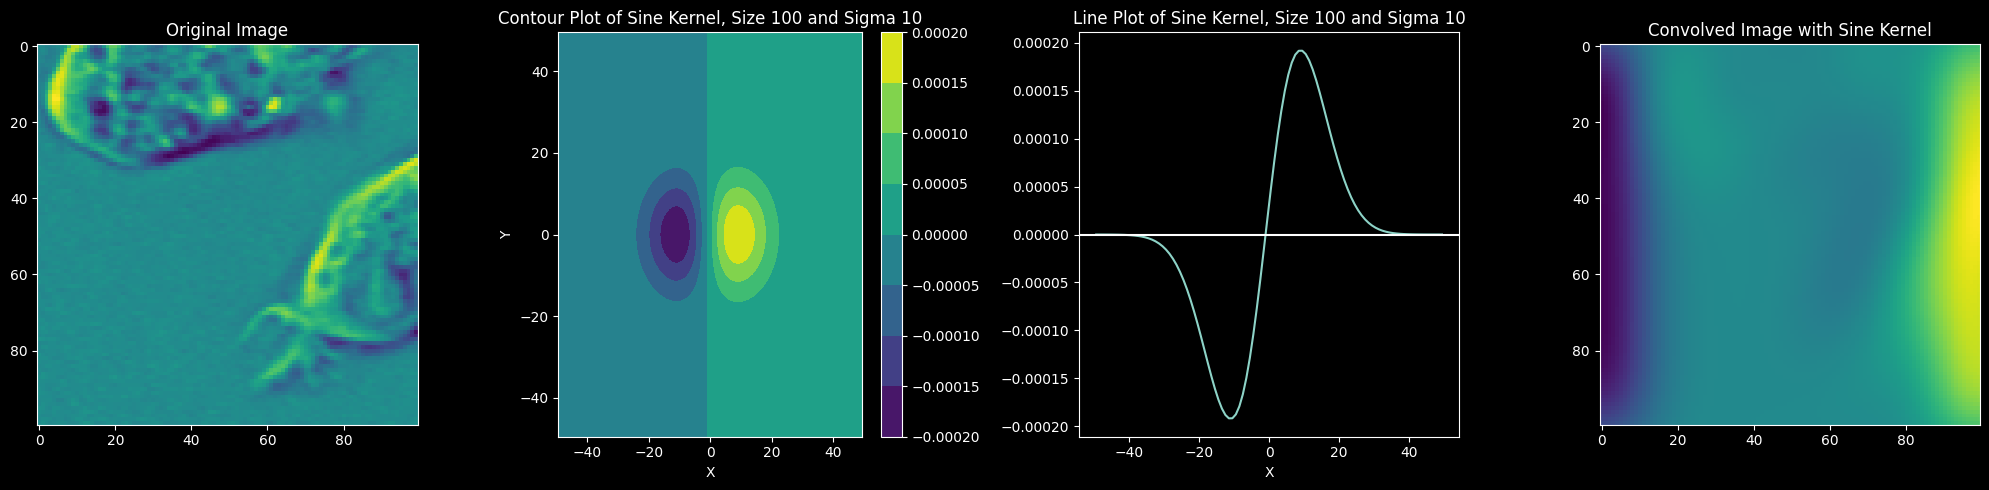

In [6]:
##### TEST OUT ALL THREE KERNELS WITH DIFFERENT KERNEL SIZES AND SIGMAS #####

# make a list of different sigmas
list_sigmas = [0.5, 1, 5, 8, 10]

for i in list_sigmas:
    normal_kernel(100,i,small_img)
    mexican_hat_kernel(100,i,small_img)
    sine_kernel(100,i,small_img)